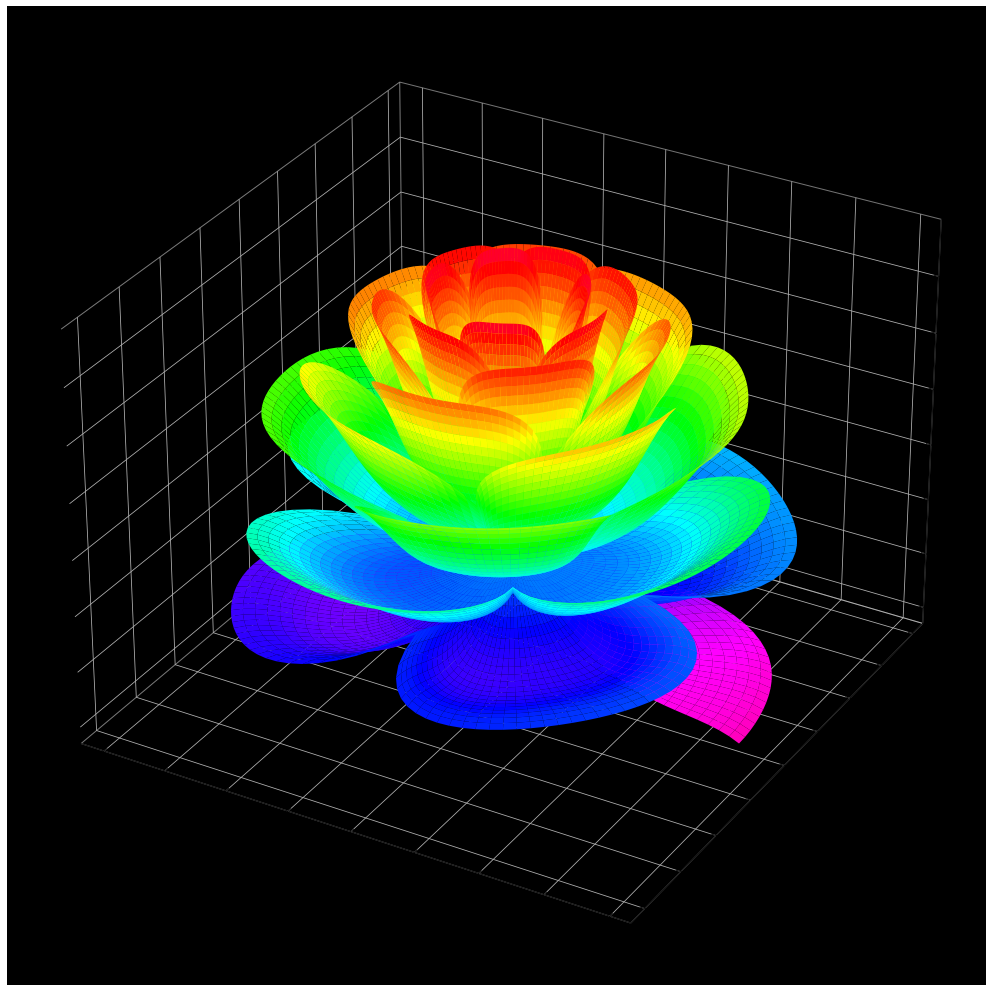

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm

# Definir la función que genera la superficie de la flor
def superficie_flor():
    [x, t] = np.meshgrid(np.array(range(25))/24.0,
                         np.arange(0, 575.5, 0.5)/575*17*np.pi-2*np.pi)

    p = (np.pi/2)*np.exp(-t/(8*np.pi))
    u = 1-(1-np.mod(3.6*t, 2*np.pi)/np.pi)**4/2
    y = 2*(x**2-x)**2*np.sin(p)
    r = u*(x*np.sin(p)+y*np.cos(p))
    
    return r*np.cos(t), r*np.sin(t), u*(x*np.cos(p)-y*np.sin(p))

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Inicializar la superficie de la flor
X, Y, Z = superficie_flor()
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gist_rainbow_r, linewidth=0, antialiased=True)

In [ ]:
# Definir la función de animación
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=20,
                               blit=True)

# Guardar la animación
anim.save('3D_flower.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())